# Universidad del Desarrollo
## Magister Data Science - Macroeconomía
### Grupo N°2: (Región de los Lagos)
* Jose Pedro
* Cristian
* Paul
* Max
* Hernan

## Calculo Indice Precios al Consumidor

**Objetivo**

El objetivo de este notebook es el calculo de IPC según el siguiente algortimo.



$ 
\begin{equation*}
IPC_t   = |\sum_{k=1}^N \frac{p_i^t}{p_i^0} w_i| * 100
\end{equation*} 
$

Donde:
* $ p_i^t $ = Precio del producto i en el momento t
* $ p_i^0 $ = Precio del producto 0 en el mes base **(2014/08=100)**
* $ w_i   $ = Ponderación del producto i en la canasta
* N = Numero de productos

In [1]:
import pandas as pd
import numpy as np
import calendar
import datetime

%matplotlib inline

In [2]:
base = "2014-08"

### 1. Se cargan el dataset de productos

In [3]:
df = pd.read_csv('output/precios_productos.csv')

In [32]:
df.sample(10)

,Momento,Sector,Producto,Factor
1580,2017-06-01,Frutillar,Carnes,0.996120
362,2016-09-01,Osorno,Huevos,0.988711
302,2015-09-01,Osorno,Huevos,1.022706
600,2016-10-01,Frutillar,Pan,0.994714
2069,2017-09-01,Puerto Varas,Cereales,0.996680
855,2017-02-01,Frutillar,Lacteos,1.005006
774,2015-09-01,Puerto Varas,Lacteos,1.003489
491,2014-12-01,Llanquihue,Pan,1.000000
2071,2017-10-01,Llanquihue,Cereales,1.035804
2504,2017-02-01,Puerto Varas,Aceite,1.024221


In [5]:
df.Sector.value_counts()

Puerto Montt    517
Osorno          517
Llanquihue      517
Frutillar       517
Puerto Varas    517
Name: Sector, dtype: int64

### 2. Calculamos precios base

In [6]:
dfp = pd.read_csv("output/canasta_ipc.csv")

In [7]:
dfp.head()

,Momento,Sector,Producto,Variedad,Promedio
0,2014-08,Frutillar,Aceite,Maravilla,1807.484158
1,2014-09,Frutillar,Aceite,Maravilla,1680.222200
2,2014-10,Frutillar,Aceite,Maravilla,1651.904700
3,2014-11,Frutillar,Aceite,Maravilla,1807.484158
4,2014-12,Frutillar,Aceite,Maravilla,1807.484158


In [8]:
df_pb = dfp[dfp.Momento==base]

In [9]:
df_pb.sample(5)

,Momento,Sector,Producto,Variedad,Promedio
24513,2014-08,Osorno,Hortaliza,Cebolla,133.666600
36806,2014-08,Puerto Montt,Pan,Hallulla corriente,1019.000000
34742,2014-08,Llanquihue,Lacteos,Queso Mantecoso,6755.682376
37950,2014-08,Puerto Montt,Pan,Marraqueta,1028.111100
29839,2014-08,Osorno,Hortaliza,Repollo,916.055500


In [10]:
pb = df_pb.groupby(["Producto"]).mean()
pb

,Promedio
Producto,
Aceite,1550.660213
Azucar,626.972709
Carnes,4988.965919
Cereales,836.436504
Frutas,1436.414083
Harina,719.486763
Hortaliza,916.972072
Huevos,1844.462405
Lacteos,3281.595206


### 3. IPC Osorno

In [11]:
df_osorno = df[(df.Sector=="Osorno") & (df.Momento > base + "-01")]

In [12]:
df_osorno.Sector.value_counts()

Osorno    506
Name: Sector, dtype: int64

In [33]:
def GetIPC(df, df_base):
    v = []
    for o in df.Momento:
        ipc = 1
        prod = df[df.Momento == o].Producto
        for row in prod:
            p_0 = df_base.loc[row].iloc[0]
            p_j = df[(df.Momento == o) & (df.Producto == row)].Factor.iloc[0]
            
            ipc =+ ((p_j/p_0)*0.1567)

        v.append({ipc*100, o})
        
    return pd.DataFrame(v, columns=['ipc', 'Momento'])

In [34]:
df_ipc = GetIPC(df_osorno, pb)

In [35]:
df_ipc.head()

,ipc,Momento
0,0.00992842,2014-09-01
1,0.00999077,2014-10-01
2,0.0100052,2014-11-01
3,2014-12-01,0.0101047
4,2015-01-01,0.00983429


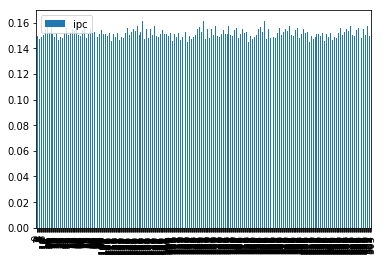

In [31]:
df_ipc.plot(kind="bar")